# Breast Cancer sample with KNN 

In [5]:
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

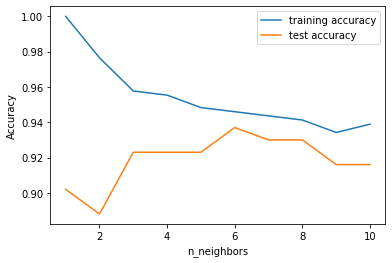

In [6]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

# Tuning Hyperparameters with Cross-Validation

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)


cross_val_scores = []
neighbors = np.arange(1,15,2)
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn,X_train,y_train,cv=5)
    cross_val_scores.append(np.mean(scores))

    
print("Best CV Score: {:.4f}".format(np.max(cross_val_scores)))
best_nn = neighbors[np.argmax(cross_val_scores)]
print("Best n_neighbors: {}".format(best_nn))

Best CV Score: 0.9343
Best n_neighbors: 13


# Tuning Hyperparameters with GrideSearch

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV

In [10]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X=cancer.data
y=cancer.target


In [12]:
# Create standardizer
standardizer = StandardScaler()
# Standardize features
features_standardized = standardizer.fit_transform(X)

#Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

# Create a pipeline
pipe = Pipeline([("standardizer", standardizer), ("knn",knn)])



# Create space of candidate values
search_space = [{"knn__n_neighbors": [1, 2, 3, 4, 5, 6, 7,8, 9, 10]}]
# Create grid search
classifier = GridSearchCV(pipe, search_space, cv=5,verbose=0).fit(features_standardized, y)

In [13]:
# Best neighborhood size (k)
classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('standardizer', StandardScaler()),
  ('knn', KNeighborsClassifier(n_jobs=-1, n_neighbors=7))],
 'verbose': False,
 'standardizer': StandardScaler(),
 'knn': KNeighborsClassifier(n_jobs=-1, n_neighbors=7),
 'standardizer__copy': True,
 'standardizer__with_mean': True,
 'standardizer__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': -1,
 'knn__n_neighbors': 7,
 'knn__p': 2,
 'knn__weights': 'uniform'}